# BIOS512 Assignment #4

🌬 For this assignment we are going to work with [Canada wind turbine](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-10-27/readme.md) data from TidyTuesday. 💨

Use `read_csv` to load the data from the TidyTuesday GitHub repository. The project URL is can be found at [https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-10-27/](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-10-27/).

In [10]:
library('tidyverse')
t <- read_csv("wind-turbine.csv")
t |> head()

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Rows: 6698 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (8): province_territory, project_name, turbine_identifier, turbine_numbe...
dbl (7): objectid, total_project_capacity_mw, turbine_rated_capacity_k_w, ro...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


objectid,province_territory,project_name,total_project_capacity_mw,turbine_identifier,turbine_number_in_project,turbine_rated_capacity_k_w,rotor_diameter_m,hub_height_m,manufacturer,model,commissioning_date,latitude,longitude,notes
<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,Alberta,Optimist Wind Energy,0.90,OWE1,1/2,150,23,30,Bonus,AN 150/30,1993,49.52535,-114.0548,NA
2,Alberta,Castle River Wind Farm,44.00,CRW1,1/60,600,44,40,Vestas,V44/600,1997,49.51264,-114.0357,NA
3,Alberta,Waterton Wind Turbines,3.78,WWT1,1/6,600,44,50,Vestas,V44/600,1998,49.23307,-113.6549,NA
4,Alberta,Waterton Wind Turbines,3.78,WWT2,2/6,600,44,50,Vestas,V44/600,1998,49.23303,-113.6302,NA
5,Alberta,Waterton Wind Turbines,3.78,WWT3,3/6,600,44,50,Vestas,V44/600,1998,49.21755,-113.6802,NA
6,Alberta,Waterton Wind Turbines,3.78,WWT4,4/6,660,47,50,Vestas,V47/660,2000,49.21773,-113.6579,NA


Each row in the table represents a single turbine.

Make a bar chart 📊 **sorted by frequency** of turbine count per province territory. (Hint: `fct_infreq` will sort your factor levels by frequency for subsequent plotting)

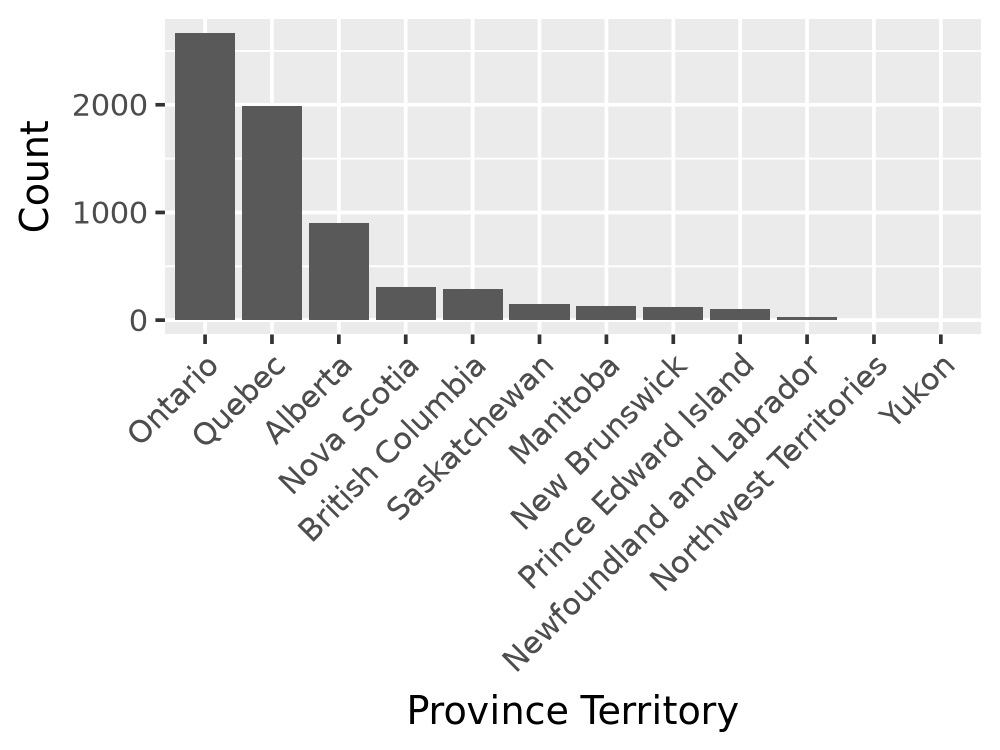

In [11]:
t = mutate(t, province_territory = fct_infreq(province_territory))
p = ggplot(t, aes(x = province_territory)) + geom_bar() + labs(x = "Province Territory", y = "Count") + theme(
    axis.text.x = element_text(angle = 45, hjust = 1)
  )
p

Make a bar chart **sorted by frequency** of turbine count per manufacturer. **Group the low frequency manufacturers into an `Other` category**.

**Bonus:** Can you force the `Other` category to be the last bar? 

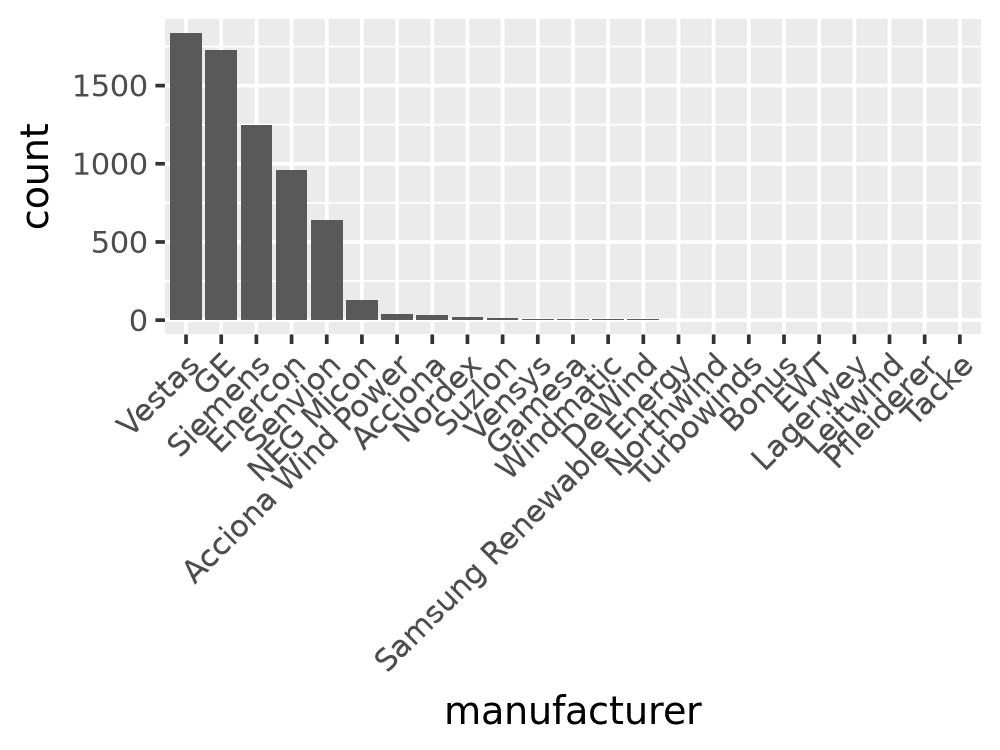

In [33]:
u = mutate(t, manufacturer = fct_infreq(manufacturer))
x = ggplot(u, aes(x = manufacturer)) + geom_bar() + theme(
    axis.text.x = element_text(angle = 45, hjust = 1)
  )
x

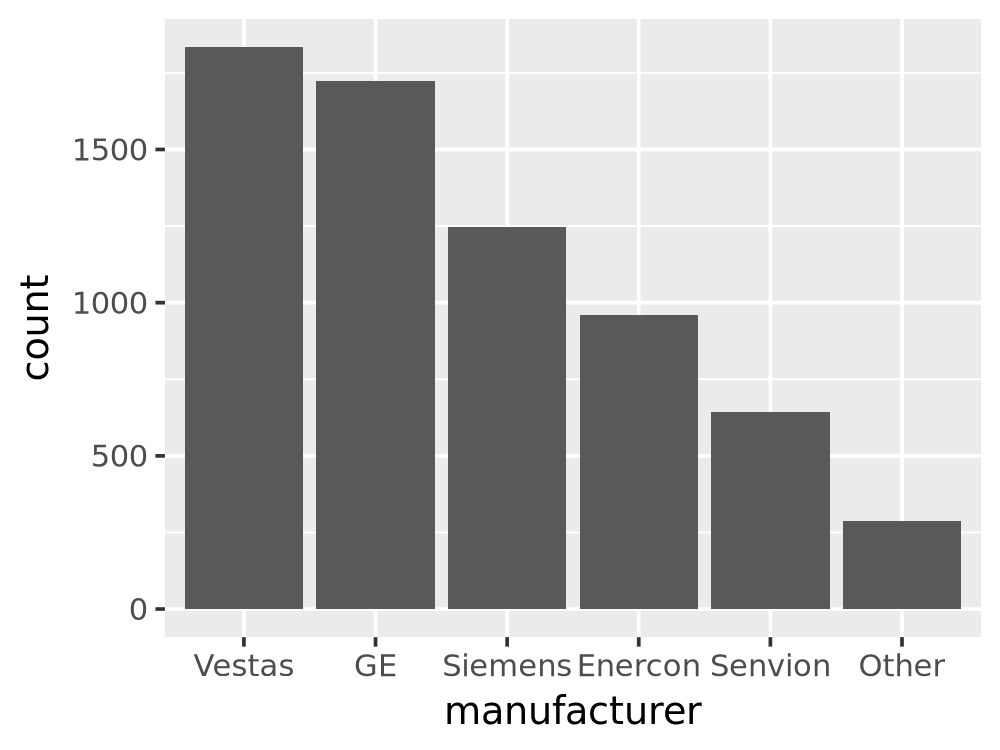

In [43]:
threshold = 200
manufacturer_counts = t |> group_by(manufacturer) |> summarize(count = n()) |> ungroup()

t_with_other =  t |> left_join(manufacturer_counts, by = 'manufacturer') |> mutate(manufacturer = case_when(count.x < threshold ~ "Other", TRUE ~ manufacturer))
t_with_other = mutate(t_with_other, manufacturer = fct_infreq(manufacturer))
h = ggplot(t_with_other, aes(x = manufacturer)) + geom_bar()
h




Let's make a map of where each turbine is located. 🗺️

In the cell below ⬇️ load the `mapdata` package.

In [49]:
library(mapdata)

Now we can retrieve the "data" for a map of Canada. Run this code:

In [62]:
canada = map_data('world', region='Canada')  

Are the column names for `latitude` and `longitude` the same for your Canada map data and the turbine data?

In [63]:

t |> head()
canada = rename(canada, latitude = lat)
canada = rename(canada, longitude = long)
canada |> head()

objectid,province_territory,project_name,total_project_capacity_mw,turbine_identifier,turbine_number_in_project,turbine_rated_capacity_k_w,rotor_diameter_m,hub_height_m,manufacturer,model,commissioning_date,latitude,longitude,notes,count.x,count.y,count.x.x,count.y.y,count
<dbl>,<fct>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,<int>,<int>
1,Alberta,Optimist Wind Energy,0.90,OWE1,1/2,150,23,30,Other,AN 150/30,1993,49.52535,-114.0548,NA,2,2,2,2,288
2,Alberta,Castle River Wind Farm,44.00,CRW1,1/60,600,44,40,Vestas,V44/600,1997,49.51264,-114.0357,NA,1834,1834,1834,1834,1834
3,Alberta,Waterton Wind Turbines,3.78,WWT1,1/6,600,44,50,Vestas,V44/600,1998,49.23307,-113.6549,NA,1834,1834,1834,1834,1834
4,Alberta,Waterton Wind Turbines,3.78,WWT2,2/6,600,44,50,Vestas,V44/600,1998,49.23303,-113.6302,NA,1834,1834,1834,1834,1834
5,Alberta,Waterton Wind Turbines,3.78,WWT3,3/6,600,44,50,Vestas,V44/600,1998,49.21755,-113.6802,NA,1834,1834,1834,1834,1834
6,Alberta,Waterton Wind Turbines,3.78,WWT4,4/6,660,47,50,Vestas,V47/660,2000,49.21773,-113.6579,NA,1834,1834,1834,1834,1834


,longitude,latitude,group,order,region,subregion
,<dbl>,<dbl>,<dbl>,<int>,<chr>,<chr>
1,-59.78760,43.93960,1,1,Canada,Sable Island
2,-59.92227,43.90391,1,2,Canada,Sable Island
3,-60.03775,43.90664,1,3,Canada,Sable Island
4,-60.11426,43.93911,1,4,Canada,Sable Island
5,-60.11748,43.95337,1,5,Canada,Sable Island
6,-59.93604,43.93960,1,6,Canada,Sable Island


The code below creates a map of Canada. Modify the code to add the turbine locations. 

❗️ **Hint:** use `geom_point`. Remember to, 
1. define encodings inside of `geom_point` that work for the **turbine data**, and
2. to override the data in `geom_point` to use the **turbine data** instead of the **Canada map data**. ❗️

[This](https://github.com/chuckpr/BIOS512/blob/main/assignments/2024/map.png?raw=true) is what the map should look like...

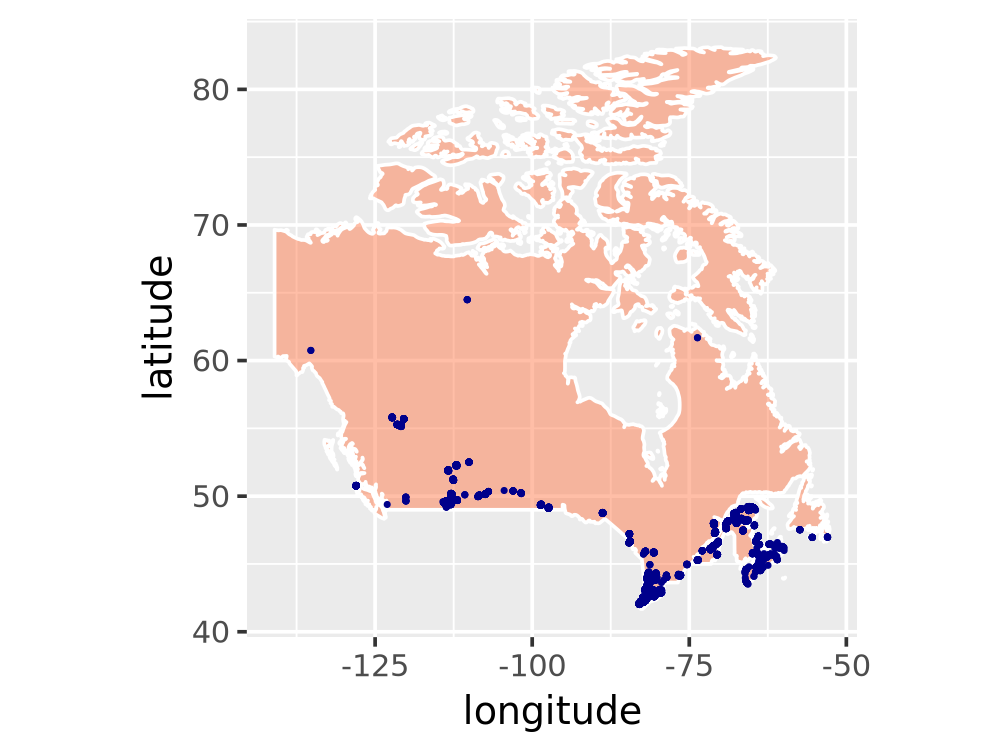

In [75]:
ggplot(data = canada) + 
    geom_polygon(aes(x = longitude, y = latitude, group = group), fill = 'coral', color = "white", alpha = 0.5) + 
    coord_quickmap() + geom_point(data = t,aes(x = longitude, y = latitude), color = "darkblue", size = .3)